In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('labeled_dysx.csv')

In [4]:
data.head()

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1
1,0.6,0.7,0.8,0.9,0.5,0.8,2
2,0.6,0.4,0.3,0.3,0.4,0.6,1
3,0.3,0.5,0.2,0.1,0.3,0.5,0
4,0.7,0.6,0.7,0.8,0.9,0.5,2


In [5]:
data.isnull().sum()

Language_vocab           0
Memory                   0
Speed                    0
Visual_discrimination    0
Audio_Discrimination     0
Survey_Score             0
Label                    0
dtype: int64

In [6]:
values = data.values
print(values)

[[0.5 0.6 0.5 ... 0.6 0.7 1. ]
 [0.6 0.7 0.8 ... 0.5 0.8 2. ]
 [0.6 0.4 0.3 ... 0.4 0.6 1. ]
 ...
 [0.7 0.5 0.8 ... 0.8 0.5 1. ]
 [0.3 0.5 0.4 ... 0.6 0.6 1. ]
 [0.7 0.7 0.8 ... 0.8 0.6 2. ]]


<AxesSubplot:>

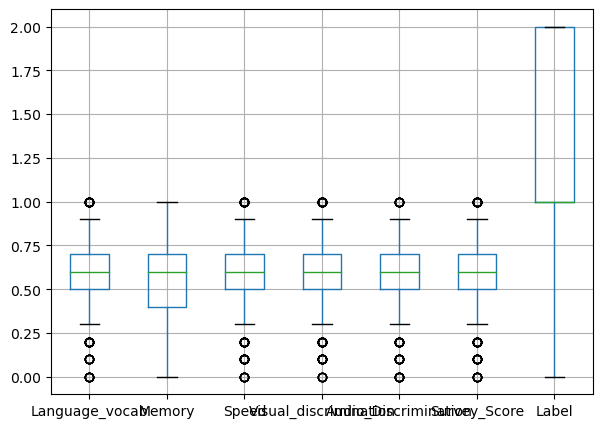

In [7]:
data.boxplot(figsize=(7,5))

In [8]:
target = data['Label']

In [9]:
df = data.drop('Label',axis=1)

In [10]:
data

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1
1,0.6,0.7,0.8,0.9,0.5,0.8,2
2,0.6,0.4,0.3,0.3,0.4,0.6,1
3,0.3,0.5,0.2,0.1,0.3,0.5,0
4,0.7,0.6,0.7,0.8,0.9,0.5,2
...,...,...,...,...,...,...,...
495,0.4,0.3,0.1,0.4,0.2,0.5,0
496,0.4,0.6,0.5,0.6,0.5,0.4,1
497,0.7,0.5,0.8,0.9,0.8,0.5,1
498,0.3,0.5,0.4,0.6,0.6,0.6,1


In [11]:
df

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score
0,0.5,0.6,0.5,0.8,0.6,0.7
1,0.6,0.7,0.8,0.9,0.5,0.8
2,0.6,0.4,0.3,0.3,0.4,0.6
3,0.3,0.5,0.2,0.1,0.3,0.5
4,0.7,0.6,0.7,0.8,0.9,0.5
...,...,...,...,...,...,...
495,0.4,0.3,0.1,0.4,0.2,0.5
496,0.4,0.6,0.5,0.6,0.5,0.4
497,0.7,0.5,0.8,0.9,0.8,0.5
498,0.3,0.5,0.4,0.6,0.6,0.6


In [12]:
sorted(df)
xsmall = df.min()
q1, q3 = np.percentile(df, [25,75])
xlarge = df.max()

iqr = q3-q1
lb = q1-(1.5*iqr)
ub = q3+(1.5*iqr)

In [13]:
df1 = df[df < ub]
df1

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score
0,0.5,0.6,0.5,0.8,0.6,0.7
1,0.6,0.7,0.8,0.9,0.5,0.8
2,0.6,0.4,0.3,0.3,0.4,0.6
3,0.3,0.5,0.2,0.1,0.3,0.5
4,0.7,0.6,0.7,0.8,0.9,0.5
...,...,...,...,...,...,...
495,0.4,0.3,0.1,0.4,0.2,0.5
496,0.4,0.6,0.5,0.6,0.5,0.4
497,0.7,0.5,0.8,0.9,0.8,0.5
498,0.3,0.5,0.4,0.6,0.6,0.6


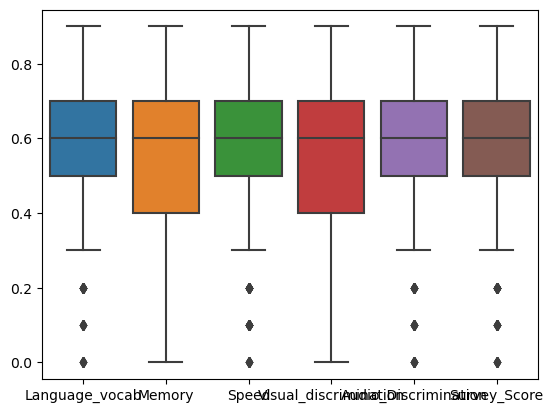

In [14]:
sns.boxplot(data=df1)
plt.show()

In [15]:
df1 = df[df > lb]
df1

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score
0,0.5,0.6,0.5,0.8,0.6,0.7
1,0.6,0.7,0.8,0.9,0.5,0.8
2,0.6,0.4,0.3,0.3,0.4,0.6
3,0.3,0.5,NaN,NaN,0.3,0.5
4,0.7,0.6,0.7,0.8,0.9,0.5
...,...,...,...,...,...,...
495,0.4,0.3,NaN,0.4,NaN,0.5
496,0.4,0.6,0.5,0.6,0.5,0.4
497,0.7,0.5,0.8,0.9,0.8,0.5
498,0.3,0.5,0.4,0.6,0.6,0.6


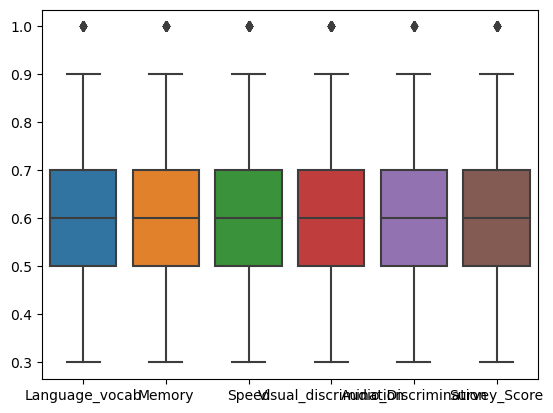

In [16]:
sns.boxplot(data=df1)
plt.show()

In [17]:
df1 = df[(df > lb) & (df < ub)]

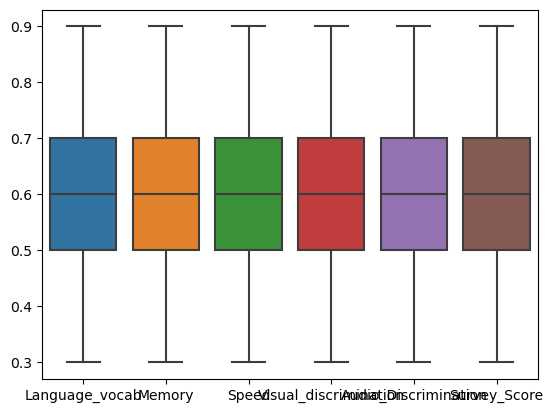

In [18]:
sns.boxplot(data=df1)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:

X = data.iloc[:, 0:6].values
Y = data.Label

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)

LogisticRegression()

In [24]:
Predictions = LR_classifier.predict(X_test)

In [25]:
print(Predictions)

[1 1 1 2 2 1 2 2 0 1 1 2 2 2 2 2 0 1 1 1 0 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 0 1 1 2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 2
 1 2 1 2 2 1 1 1 0 2 0 1 2 1 1 1 0 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1
 1 2 1 2 0 2 1 1 2 1 1 2 1 1 2 2 2 0 1 0 1 2 2 2 1 0 1 0 1 1 1 2 2 1 2 1 1
 2 1]


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Predictions)
cm

array([[11,  4,  0],
       [ 1, 75,  3],
       [ 0,  2, 54]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Predictions))

0.9333333333333333


In [28]:
from sklearn.linear_model import LogisticRegressionCV

model1 = LogisticRegressionCV(cv=5)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [29]:
print(accuracy)

0.9533333333333334


In [30]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[13,  2,  0],
       [ 1, 75,  3],
       [ 0,  1, 55]], dtype=int64)

In [31]:
from sklearn.metrics import mean_absolute_error
model_error = mean_absolute_error(y_pred, y_test)
model_error

0.04666666666666667

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, average_precision_score

# Assuming 'y_true' are the true labels and 'y_pred' are the predicted labels
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
#average_precision_macro = average_precision_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)
print("Macro F1-Score:", f1_macro)
#print("Macro Average Precision:", average_precision_macro)



Accuracy: 0.9533333333333334
Confusion Matrix:
 [[13  2  0]
 [ 1 75  3]
 [ 0  1 55]]
Macro Precision: 0.9461285840596186
Macro Recall: 0.9327255374723729
Macro F1-Score: 0.9389593391928464


In [33]:
name = input("Enter name of applicant: ")
print("\nThe scores of all the tests in quiz as well as survey need to be entered.")
print("All the values lie in the range 0 to 1.\n")
lang_vocab = float(input("Enter the score of Language Vocab test: "))
memory = float(input("Enter the score of Memory test: "))
speed = float(input("Enter the score of Speed test: "))
visual = float(input("Enter the score of Visual Discrimination test: "))
audio = float(input("Enter the score of Audio Discrimination test: "))
survey = float(input("Enter the score obtained from Survey: "))

Enter name of applicant: abc

The scores of all the tests in quiz as well as survey need to be entered.
All the values lie in the range 0 to 1.

Enter the score of Language Vocab test: 0.1
Enter the score of Memory test: 0
Enter the score of Speed test: 0.1
Enter the score of Visual Discrimination test: 0.2
Enter the score of Audio Discrimination test: 0.1
Enter the score obtained from Survey: 0.2


In [36]:
def get_result(lang_vocab, memory, speed, visual, audio, survey):
    array = np.array([[lang_vocab, memory, speed, visual, audio, survey]])
    label = int(model1.predict(array))
    if label == 0:
        output = "There is a high chance of the applicant to have dyslexia."
    elif label == 1:
        output = "There is a moderate chance of the applicant to have dyslexia."
    else:
        output = "There is a low chance of the applicant to have dyslexia."
    return output

result = get_result(lang_vocab, memory, speed, visual, audio, survey)
print(result)

There is a high chance of the applicant to have dyslexia.


In [40]:

import pickle
pickle.dump(model1,open('model1.pkl','wb'))
